In [1]:
from keras.models import Model, Sequential
from keras.layers import Dense , Activation, Reshape, BatchNormalization , Input
from keras.layers import Conv2D ,UpSampling2D ,Flatten 
from keras.optimizers import Adam 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#üretec
def generator(input_dim = 100):
    
    model = Sequential()
    model.add(Dense(2048, input_dim = input_dim))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(Dense(7*7*256))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(Reshape((7,7,256), input_shape = (7*7*256,)))
    model.add(UpSampling2D((2,2)))
    
    model.add(Conv2D(64 , (3,3) , padding = "same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(UpSampling2D((2,2)))
    
    model.add(Conv2D(1 , (3,3), padding = "same"))
    model.add(Activation("tanh"))
    
    model.compile(loss = "binary_crossentropy" , optimizer = Adam(learning_rate=0.0002 , beta_1=0.5))
    
    return model

In [3]:
gen = generator()
gen.summary()

gen.load_weights("modelFashion.h5")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              206848    
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1

<Figure size 720x720 with 0 Axes>

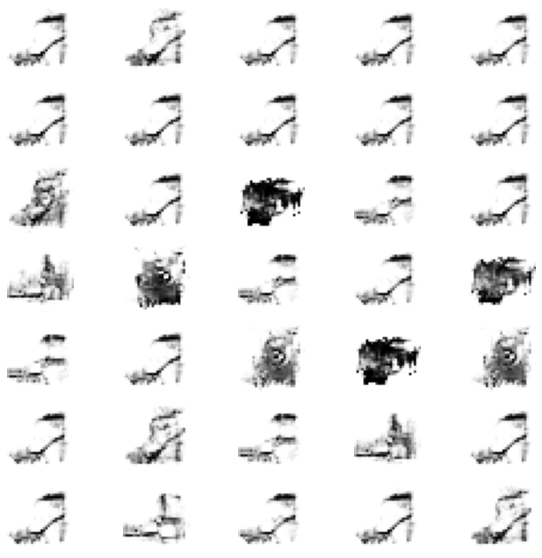

In [10]:
noise = np.random.normal(0 , 1, [64,100])
generator_images = gen.predict(noise) # 28,28,1

plt.figure(figsize = (10,10))

plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.imshow(generator_images[i], cmap=plt.cm.binary)
    plt.axis("off")    
plt.show()